Typical DS packages

In [1380]:
import warnings 
warnings.filterwarnings('ignore')

In [1381]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.colors import to_rgba

from sklearn import datasets

from tqdm import tqdm

In [1382]:
pip install -r requirements.txt

  Cloning https://github.com/EgorDudyrev/caspailleur.git to /private/var/folders/ym/ymvbx_ts67n0ln90hj1qmz8h0000gn/T/pip-install-uvu4hui0/caspailleur_ed969ab1e7714404aa5a223490bb65f0
  Running command git clone --filter=blob:none --quiet https://github.com/EgorDudyrev/caspailleur.git /private/var/folders/ym/ymvbx_ts67n0ln90hj1qmz8h0000gn/T/pip-install-uvu4hui0/caspailleur_ed969ab1e7714404aa5a223490bb65f0
  Resolved https://github.com/EgorDudyrev/caspailleur.git to commit b65df09edaef0767c8d5a5aa97a9efe809c7d24a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/EgorDudyrev/paspailleur.git (to revision feature/pattern_keys) to /private/var/folders/ym/ymvbx_ts67n0ln90hj1qmz8h0000gn/T/pip-install-uvu4hui0/paspailleur_eaeb8594bdc24e2f84eb777a4bd4b7ff
  Running command git clone --filter=blob:none --quiet https://github.com/EgorDudyrev/paspailleur.git /private/var/folders/ym/ymvb

In [1383]:
# cities = pd.read_csv('worldcities.csv')

In [1384]:
#cities

In [1385]:
#new_cities = cities.loc[cities["country"] == "Spain"]

In [1386]:
#new_cities

In [1387]:
# new_cities = new_cities.drop(['id','country', 'iso2', 'iso3', 'city_ascii'], axis = 1)
# new_cities

In [1388]:
# new_cities = new_cities.drop(['capital'], axis = 1)
# new_cities

In [1389]:
# new_cities['sample_id'] = np.arange(0, new_cities.shape[0], 1).astype(str)
# new_cities['id'] = new_cities['sample_id'].apply(lambda x:  'h'+x)
# new_cities.drop(columns=['sample_id'], inplace=True)
# new_cities=new_cities.set_index('id')
# new_cities

In [1390]:
# new_cities = new_cities.drop(['population'], axis = 1)
# new_cities

FCA packages

In [1391]:
import caspailleur as csp
from paspailleur import pattern_structures as PS

Bitarrays that make operations on extent really fast

# Clustering Step 1. Get the data

In [1392]:
from bitarray.util import subset as ba_subset
from bitarray import frozenbitarray

Copy-pasting the code from https://scikit-learn.org/stable/modules/clustering.html

## noisy circles

In [1393]:
# # ============
# # Generate datasets. We choose the size big enough to see the scalability
# # of the algorithms, but not too big to avoid too long running times
# # ============
# n_samples = 500
# seed = 30
# noisy_circles = datasets.make_circles(
#     n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
# )
# X, y = noisy_circles

## noisy moons

In [1394]:
# # ============
# # Generate datasets. We choose the size big enough to see the scalability
# # of the algorithms, but not too big to avoid too long running times
# # ============
# n_samples = 500
# seed = 30
# noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)

# X, y = noisy_moons

## blobs

In [1395]:
# # ============
# # Generate datasets. We choose the size big enough to see the scalability
# # of the algorithms, but not too big to avoid too long running times
# # ============
# n_samples = 500
# seed = 30
# blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)

# X, y = blobs

## varied

In [1396]:
# # ============
# # Generate datasets. We choose the size big enough to see the scalability
# # of the algorithms, but not too big to avoid too long running times
# # ============
# n_samples = 500
# seed = 30
# random_state = 170
# varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=170)

# X, y = varied

## no_structure

In [1397]:
# # ============
# # Generate datasets. We choose the size big enough to see the scalability
# # of the algorithms, but not too big to avoid too long running times
# # ============
# n_samples = 500
# seed = 30
# random_state = 170
# rng = np.random.RandomState(seed)
# no_structure = rng.rand(n_samples, 2), None

# X, y = no_structure

## aniso

In [1398]:
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
seed = 30
random_state = 170




X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)


X, y = aniso

# Test examples on Blobs data

In [1399]:
# # ============
# # Generate datasets. We choose the size big enough to see the scalability
# # of the algorithms, but not too big to avoid too long running times
# # ============
# n_samples = 500
# seed = 30
# blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)

# X, y = blobs

In [1400]:
import visual_lib_new as vlib

In [1401]:
from itertools import cycle, islice

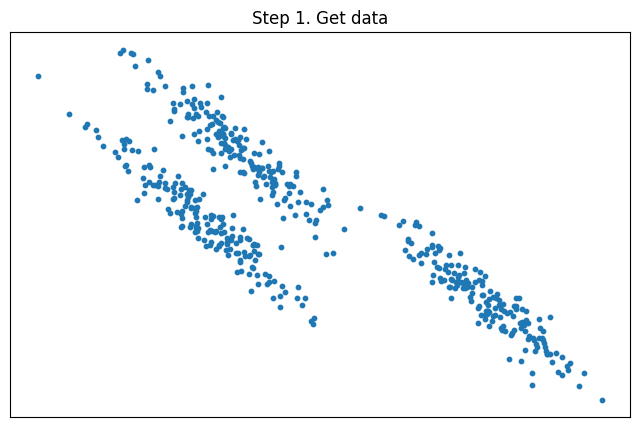

In [1402]:
fig, ax = plt.subplots(figsize=(8, 5))

vlib.init_axis(ax, 'Step 1. Get data', [], [])
ax.scatter(X[:,0], X[:,1], s=10)

fig.savefig('pipe_step1_blobs_sdata.pdf')
plt.show()

## Step 2. Setup pattern structures

#### For numerical columns, setup the grid of intervals that is not too general and not too precise

In [1403]:
linscale_x = np.linspace(X[:,0].min()-0.01, X[:,0].max()+0.01, 11)
linscale_y = np.linspace(X[:,1].min()-0.01, X[:,1].max()+0.01, 11)

ps = PS.CartesianPS([PS.IntervalPS(values=linscale_x), PS.IntervalPS(values=linscale_y)])
data = list(ps.preprocess_data(X))

## Step 3. Mine stable concepts

In [1404]:
import time

#### Stable concepts are individual clusters of similar (but not too much) objects

In [1405]:
# MIN_SUPPORT = 0.05
# MIN_STABILITY = 0.01
# PRECISION = 2

In [1406]:
Sn0 = time.time()

In [1407]:

min_cluster_support = 10
min_delta_stability = 5
print(f"{min_cluster_support/len(data)=}, {min_delta_stability/len(data)=}")


min_cluster_support/len(data)=0.02, min_delta_stability/len(data)=0.01


In [1408]:
min_added_coverage = 75
min_cluster_support = max(min_cluster_support, min_added_coverage)
print(f"{min_added_coverage/len(data)=}")

min_added_coverage/len(data)=0.15


In [1409]:
attributes, attr_extents = zip(*ps.iter_attributes(data, min_support=min_cluster_support))
print(len(attributes))

31


In [1410]:
%%time
stable_extents = csp.mine_equivalence_classes.list_stable_extents_via_gsofia(
    attr_extents,
    n_objects=len(data), min_delta_stability=min_delta_stability, min_supp=min_cluster_support,
    use_tqdm=True, n_attributes=len(attributes)
)
stable_extents = sorted(stable_extents, key=lambda ext: ext.count(), reverse=True)
print(f"n extents", len(stable_extents))


100%|█████████████████████████████████████████| 31/31 [00:00<00:00, 1849.00it/s]

n extents 356
CPU times: user 84.1 ms, sys: 31.3 ms, total: 115 ms
Wall time: 20.6 ms


In [1411]:
Sn1 = time.time()
Sn = Sn1-Sn0

In [1412]:
import clustering_newest
from clustering_newest import select_sparse_extents

In [1413]:
from clustering_newest import mine_clusterings

In [1414]:
from clustering_newest import mine_clusters_info

## Step 4. Find all minimal covering clusterings

In [1415]:
Cn0 = time.time()

In [1416]:

n_clusters_max = 4
jaccard_thold = 1 # 0.9
min_total_coverage = 450
print(f"{min_total_coverage/len(data)=}")

#### Filter out too similar clusters to simplify the search space (if having too many concepts)

min_total_coverage/len(data)=0.9


In [1417]:
sparse_extents = select_sparse_extents(stable_extents, jaccard_thold)
print(f"{len(stable_extents)=}", f"{len(sparse_extents)=}")

len(stable_extents)=356 len(sparse_extents)=356


In [1418]:
%%time
clusterings = list(mine_clusterings(
    sparse_extents,
    min_support=min_total_coverage, max_length=n_clusters_max, min_added_coverage=min_added_coverage
))
print('n clusterings:', len(clusterings))
print('max found cluster size', max(map(len, clusterings)))

#### Find the a lot of minimal clusterings

n clusterings: 47258
max found cluster size 4
CPU times: user 6.45 s, sys: 38.4 ms, total: 6.48 s
Wall time: 6.52 s


## Step 5. Choose the "optimal" clustering

In [1419]:
concepts_dict = mine_clusters_info(sparse_extents, attr_extents, ps, data)
concepts_df = pd.DataFrame(concepts_dict)
concepts_df.head()

,extent,intent,delta_stability,support,frequency,intent_human,level,density
0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","((-4.87, 2.73, (BoundStatus.RCLOSED, BoundStat...",8,496,0.992,"x0: [-4.87, 2.73], x1: [-3.16, 5.11]",1,7.891555
1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","((-4.87, 2.73, (BoundStatus.RCLOSED, BoundStat...",9,488,0.976,"x0: [-4.87, 2.73], x1: [-3.16, 4.28]",2,8.630447
2,"[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","((-4.87, 2.73, (BoundStatus.RCLOSED, BoundStat...",8,487,0.974,"x0: [-4.87, 2.73], x1: [-2.33, 5.11]",2,8.612762
3,"[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","((-4.87, 2.73, (BoundStatus.RCLOSED, BoundStat...",8,479,0.958,"x0: [-4.87, 2.73], x1: [-2.33, 4.28]",2,9.534995
4,"[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","((-4.87, 1.89, (BoundStatus.RCLOSED, BoundStat...",8,479,0.958,"x0: [-4.87, 1.89], x1: [-2.33, 5.11]",2,9.523923


In [1420]:
Cn1 = time.time()

In [1421]:
Cn = Cn1-Cn0

In [1422]:
from clustering_newest import evaluate_clustering_measures

In [1423]:
Cstat0 = time.time()

In [1424]:
clusterings_df = pd.DataFrame([evaluate_clustering_measures(idxs, concepts_dict) for idxs in clusterings],
                              index=pd.Series(clusterings, name='clustering'))
clusterings_df.head()

,coverage,overlap,size,imbalance,stability,complexity,density
clustering,,,,,,,
"(0,)",496,0,1,0.0,8.0,1.0,7.891555
"(1,)",488,0,1,0.0,9.0,2.0,8.630447
"(2,)",487,0,1,0.0,8.0,2.0,8.612762
"(3,)",479,0,1,0.0,8.0,2.0,9.534995
"(4,)",479,0,1,0.0,8.0,2.0,9.523923


In [1425]:
clusterings_df_norm = (clusterings_df-clusterings_df.min())/(clusterings_df.max()-clusterings_df.min())
clusterings_df_norm.describe().loc[['min', 'max']]

,coverage,overlap,size,imbalance,stability,complexity,density
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [1426]:
weight_params = dict(
    overlap_weight=2,
    size_weight=0.1, # old "n_concepts_weight"
    imbalance_weight=2,
    stability_weight=1,
    complexity_weight=0.1,
    density_weight=5
)

signs = np.array([1 if f in {'coverage', 'stability', 'density'} else -1 for f in clusterings_df_norm])
weights = np.array([1 if f == 'coverage' else weight_params[f"{f}_weight"] for f in clusterings_df_norm])
clusterings_df['reward'] = (clusterings_df_norm*weights*signs).sum(1)

In [1427]:
clusterings_df = clusterings_df.sort_values('reward', ascending=False)
clusterings_df.head()

,coverage,overlap,size,imbalance,stability,complexity,density,reward
clustering,,,,,,,,
"(285, 288, 289, 327)",453,0,4,15.564382,20.75,1.75,23.847484,5.272200
"(244, 288, 315, 327)",451,0,4,25.104780,24.25,2.00,23.667467,5.190004
"(288, 289, 290, 318)",455,0,4,12.500000,19.00,1.75,22.832833,4.962928
"(212, 288, 289, 318)",461,42,4,30.532769,22.75,1.75,23.267054,4.962822
"(270, 287, 288, 289)",452,42,4,5.744563,26.50,1.75,22.753270,4.962351


In [1428]:
Cstatn1 = time.time()

In [1429]:
Cstatn =Cstatn1-Cstat0

<function matplotlib.pyplot.show(close=None, block=None)>

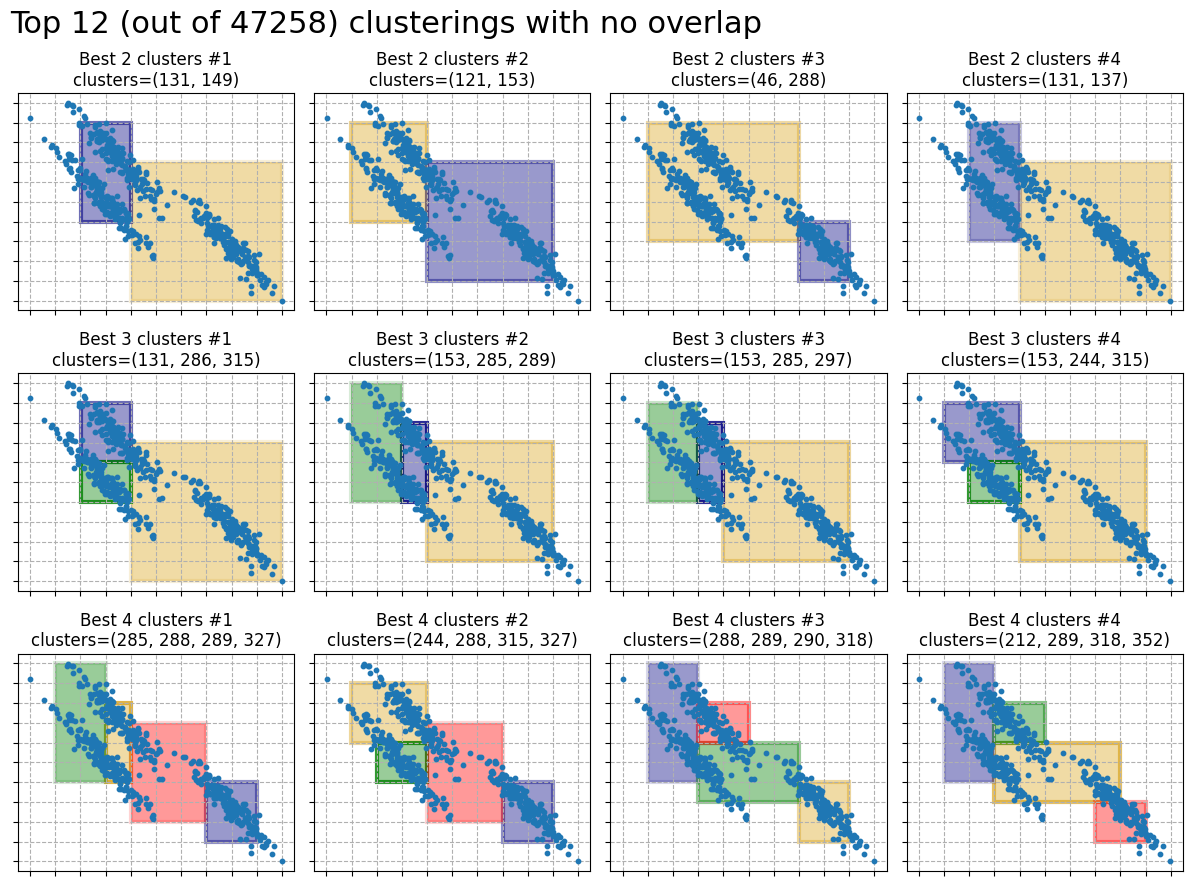

In [1430]:
fig, axs = plt.subplots(clusterings_df['size'].max()-1, 4, figsize=(12, 9))

for row_idx, n_clusters in enumerate(range(2, clusterings_df['size'].max()+1)):
    flg = (clusterings_df['size']==n_clusters)&(clusterings_df['overlap']==0)
    best_clusterings = clusterings_df[flg]
    
    for i, (ax, best_clustering) in enumerate(zip(axs[row_idx], best_clusterings.index)):
        vlib.init_axis(ax, f"Best {n_clusters} clusters #{i+1}\nclusters={best_clusterings.index[i]}", 
                       linscale_x, linscale_y, [], [],#range(len(linscale_x)), range(len(linscale_y)), 
                       grid_params=dict(zorder=0, linestyle='--'))

        ax.scatter(X[:,0], X[:,1], zorder=2, s=10)
        vlib.draw_clustering(ax, best_clustering, concepts_df)

fig.suptitle(f'Top {len(axs.flatten())} (out of {len(clusterings_df)}) clusterings with no overlap',
             size=22, ha='left', x=0.01)
fig.tight_layout()
fig.subplots_adjust()
# ax.legend(loc='lower right')
fig.savefig('best_clusters_per_size_aniso.pdf')
plt.show

In [1431]:
T_total = Cstatn+Cn+Sn
T_total

8.296338081359863

In [1432]:
# circles = dict()
# circles['dataset'] = 'noisy circles'
# circles['stab_concepts_n'] = len(stable_extents)
# circles['stab_concepts_time'] = Sn
# circles['clusterings_n'] = len(clusterings)
# circles['clusterings_time'] = Cn
# circles['statistics_time'] = Cstatn
# circles['total_time'] = T_total

In [1433]:
# moons = dict()
# moons['dataset'] = 'noisy moons'
# moons['stab_concepts_n'] = len(stable_extents)
# moons['stab_concepts_time'] = Sn
# moons['clusterings_n'] = len(clusterings)
# moons['clusterings_time'] = Cn
# moons['statistics_time'] = Cstatn
# moons['total_time'] = T_total

In [1434]:
# blobs = dict()
# blobs['dataset'] = 'blobs'
# blobs['stab_concepts_n'] = len(stable_extents)
# blobs['stab_concepts_time'] = Sn
# blobs['clusterings_n'] = len(clusterings)
# blobs['clusterings_time'] = Cn
# blobs['statistics_time'] = Cstatn
# blobs['total_time'] = T_total

In [1435]:
# varied = dict()
# varied['dataset'] = 'varied'
# varied['stab_concepts_n'] = len(stable_extents)
# varied['stab_concepts_time'] = Sn
# varied['clusterings_n'] = len(clusterings)
# varied['clusterings_time'] = Cn
# varied['statistics_time'] = Cstatn
# varied['total_time'] = T_total

In [1436]:
# no_structure = dict()
# no_structure['dataset'] = 'no structure'
# no_structure['stab_concepts_n'] = len(stable_extents)
# no_structure['stab_concepts_time'] = Sn
# no_structure['clusterings_n'] = len(clusterings)
# no_structure['clusterings_time'] = Cn
# no_structure['statistics_time'] = Cstatn
# no_structure['total_time'] = T_total

In [1437]:
aniso = dict()
aniso['dataset'] = 'aniso'
aniso['stab_concepts_n'] = len(stable_extents)
aniso['stab_concepts_time'] = Sn
aniso['clusterings_n'] = len(clusterings)
aniso['clusterings_time'] = Cn
aniso['statistics_time'] = Cstatn
aniso['total_time'] = T_total

# DATA

In [1438]:
# details = pd.DataFrame(columns = ['dataset', 'stab_concepts_n', 'stab_concepts_time','clusterings_n','clusterings_time', 'statistics_time', 'total_time' ])


In [1439]:
# details = details._append(moons, ignore_index = True)

In [1440]:
# details = details._append(moons, ignore_index = True)

In [1441]:
# details = details._append(blobs, ignore_index = True)

In [1442]:
# details = details._append(varied, ignore_index = True)

In [1443]:
# details = details._append(no_structure, ignore_index = True)

In [1444]:
details = details._append(aniso, ignore_index = True)

In [1445]:
details

,dataset,stab_concepts_n,stab_concepts_time,clusterings_n,clusterings_time,statistics_time,total_time
0,noisy circles,1153,0.276691,879702,1043.019053,22.269021,1065.564765
1,noisy moons,633,0.083258,702953,155.828046,17.742159,173.653463
2,varied,559,0.072470,100489,35.935040,2.405305,38.412815
3,no structure,1158,0.096169,100489,907.424395,2.500272,910.020836
4,aniso,356,0.101331,47258,6.980183,1.214824,8.296338


In [1553]:
details.to_csv('detailes.csv', index = False)

# OLD 

In [1447]:
# linscale = np.linspace(-1.5, 1.5, 11)
# ps_cart = PS.CartesianPS([PS.IntervalPS(values=linscale), PS.IntervalPS(values=linscale)])

In [1448]:
# borders_per_axis = [np.linspace(X[:,j].min(), X[:,j].max(), 11) for j in range(X.shape[1])]
# borders_per_axis

In [1449]:
# basic_pss = [PS.IntervalPS(values=borders, ndigits=PRECISION) for borders in borders_per_axis]
# ps_cart = PS.CartesianPS(basic_pss)
#data = list(ps_cart.preprocess_data(X))

In [1450]:
# import clustering_new_version_3

In [1451]:
# from clustering_new_version_3 import run_clustering

In [1452]:
# import time

## Attempt to put everything together (grid)

In [1453]:
# for overlap_weight_par in range(1,2):
#     for n_concepts_weight_par in range(1, 2):
#         for imbalance_weight_par in range(1, 2):
#             for stability_weight_par in range(1,2):
#                 for complexity_weight_par in range(1, 2):
#                     reward_weights = dict(
#                         overlap_weight = 0.5*overlap_weight_par, n_concepts_weight = 0.05*n_concepts_weight_par, imbalance_weight = 0.1*imbalance_weight_par,
#                         stability_weight=0.05*stability_weight_par, complexity_weight=0.05*complexity_weight_par,

#                     )
#                     t0 = time.time()
#                     concepts_df, best_clustering, clusters_df, best_log, top_log = run_clustering(X, ps_cart, reward_weights = reward_weights, thrift_factor = 2, clustering_params=None)
#                     t1 = time.time()
#                     if len(top_log['coverage'].index[0]) == 3:
#                         extents = {
#                         '0': clusters_df['extent'][top_log['coverage'].index[0][0]],
#                         '1': clusters_df['extent'][top_log['coverage'].index[0][1]],
#                         '2': clusters_df['extent'][top_log['coverage'].index[0][2]],
    
#                         }

#                         object_clusters = {
#                         '0': clusters_df['extent'][top_log['coverage'].index[0][0]].search(True),
#                         '1': clusters_df['extent'][top_log['coverage'].index[0][1]].search(True),
#                         '2': clusters_df['extent'][top_log['coverage'].index[0][2]].search(True)
#                         }

#                         obj_belongs = np.array([0]*500)
#                         for i in range(0, 500): 
#                             if(i in object_clusters['0']) and (i not in object_clusters['1']) and (i not in object_clusters['2']):
#                                 obj_belongs[i] = 0
        
#                             elif (i in object_clusters['1']) and (i not in object_clusters['0']) and (i not in object_clusters['2']):
#                                 obj_belongs[i] = 1        
#                             elif (i in object_clusters['2']) and (i not in object_clusters['0']) and (i not in object_clusters['1']):
#                                 obj_belongs[i] = 2
#                             elif  (i not in object_clusters['2']) and (i not in object_clusters['0']) and (i not in object_clusters['1']):
#                                 obj_belongs[i] = -1
#                             else:
#                                 obj_belongs[i] = 6
#                     else:
#                         extents = {
#                         '0': clusters_df['extent'][top_log['coverage'].index[0][0]],
#                         '1': clusters_df['extent'][top_log['coverage'].index[0][1]],
    
#                         }
#                         object_clusters = {
#                         '0': clusters_df['extent'][top_log['coverage'].index[0][0]].search(True),
#                         '1': clusters_df['extent'][top_log['coverage'].index[0][1]].search(True),
#                         }

#                         obj_belongs = np.array([0]*500)
#                         for i in range(0, 500): 
#                             if(i in object_clusters['0']) and (i not in object_clusters['1']):
#                                 obj_belongs[i] = 0
        
#                             elif (i in object_clusters['1']) and (i not in object_clusters['0']):
#                                 obj_belongs[i] = 1        

#                             elif (i in object_clusters['1']) and (i in object_clusters['0']):
#                                 obj_belongs[i] = 6  
    
#                             else:
#                                 obj_belongs[i] = -1


#                     t0_d = dict()
#                     t1_d = dict()
#                     obj_belonging  = dict()

#                     obj_belonging['circles'] = obj_belongs.copy()
#                     t0_d['circles'] = t0
#                     t1_d['circles'] = t1
#                     t_circ = t1-t0
#                     reward_circ, reward_details_circ = clustering_reward2(best_clustering, concepts_df, **reward_weights)




#                     fig, ax = plt.subplots(figsize=(8,5))
#                     #vlib.init_axis(ax, f"aniso optimal not-much-overlapping clusters", borders_per_axis[0], borders_per_axis[1], range(len(borders_per_axis[0])), range(len(borders_per_axis[1])), grid_params=dict(zorder=0, linestyle='--'))
#                     vlib.init_axis(ax, f"Aniso optimal not-much-overlapping clusters", borders_per_axis[0], borders_per_axis[1], range(len(borders_per_axis[0])), range(len(borders_per_axis[1])), grid_params=dict(zorder=0, linestyle='--'))

#                     colors = np.array(
#                                 list(
#                                     islice(
#                                         cycle(
#                                             [
#                                                 "#377eb8",
#                                                 "#ff7f00",
#                                                 "#4daf4a",
#                                                 "#f781bf",
#                                                 "#a65628",
#                                                 "#984ea3",
#                                                 "#999999",
#                                                 "#e41a1c",
#                                                 "#dede00",
#                                             ]
#                                         ),
#                                         int(max(obj_belongs) + 1),
#                                     )
#                                 )
#                     )
#                     colors = np.append(colors, ["#000000"])
#                     plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[obj_belongs])

#                     # for i, (k, v) in enumerate([('Reward', reward_circ)]+ list(reward_details_circ.items())+ list(reward_weights.items())):
#                     #     ax.text(-1, -1.7-i*0.1, f"{k}: {v:.4f}")
#                     for i, (k, v) in enumerate(list(reward_weights.items())):
#                         ax.text(-6, -1.5-0.4*i, f"{k}: {v:.4f}")
#                     #ax.legend(loc='lower right')

#                     #ax.legend(loc='left')


#                     plt.text(0.99,0.01, ("%.2fs" % (t1 - t0)).lstrip("0"), transform=plt.gca().transAxes, size=15, horizontalalignment="right",)
#                     fig.savefig('aniso_best.pdf')
#                     plt.show()

                    



                    




                        
                        
                    
                    
                    
            

In [1454]:
# fig, axs = plt.subplots(1, 2, figsize=(10, 5))


# ax = axs[0]
# vlib.init_axis(ax, f"Old clustering algo", linscale, lin
# 100%|█████████████████████████████████████████| 34/34 [00:00<00:00, 2424.37it/s]
# Compute intents: 100%|██████████████████████| 793/793 [00:00<00:00, 2573.41it/s]
# No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.

# 100%|█████████████████████████████████████████| 34/34 [00:00<00:00, 2368.33it/s]
# Compute intents: 100%|██████████████████████| 793/793 [00:00<00:00, 2575.94it/s]
# scale, range(len(linscale)), range(len(linscale)), grid_params=dict(zorder=0, linestyle='--'))

# reward, reward_details = clib.clustering_reward2(best_clustering_old, concepts_df, **reward_weights)
# for i, (k, v) in enumerate([('Reward', reward)]+ list(reward_details.items())):
#     ax.text(-1, -1.7-i*0.1, f"{k}: {v:.4f}")

# ax.scatter(X[:,0], X[:,1], zorder=2, s=10)
# vlib.draw_clustering(ax, best_clustering_old, concepts_df)
# ax.legend(loc='lower right')


# ax = axs[1]
# vlib.init_axis(ax, f"New clustering algo", linscale, linscale, range(len(linscale)), range(len(linscale)), grid_params=dict(zorder=0, linestyle='--'))

# ax.scatter(X[:,0], X[:,1], zorder=2, s=10)
# vlib.draw_clustering(ax, best_clustering, concepts_df)

# reward, reward_details = clib.clustering_reward2(best_clustering, concepts_df, **reward_weights)
# for i, (k, v) in enumerate([('Reward', reward)]+ list(reward_details.items())+ list(reward_weights.items())):
#     ax.text(-1, -1.7-i*0.1, f"{k}: {v:.4f}")


# ax.legend(loc='lower right')
# #fig.savefig('../figures/pipe_step4_circlesdata.pdf')
# plt.show()


## End of the attempt

In [1455]:
# reward_weights = dict(
#     overlap_weight=0.01, n_concepts_weight=0.01, imbalance_weight=0.01,
#     stability_weight=0.01, complexity_weight=0.01,

# )

In [1456]:
# t0 = time.time()
# concepts_df, best_clustering, clusters_df, best_log, top_log = run_clustering(X, ps_cart, reward_weights = reward_weights, thrift_factor = 2, clustering_params=None)
# t1 = time.time()

In [1457]:
# clusters_df

In [1458]:
# best_log

In [1459]:
# top_log

In [1460]:
# top_log['coverage'].index[0]

## GRAPHS

## For 3 concepts

In [1461]:
# extents = {
# '0': clusters_df['extent'][0],
# '1': clusters_df['extent'][1343],
# '2': clusters_df['extent'][1685],
    
# }

In [1462]:
# object_clusters = {
# '0': clusters_df['extent'][0].search(True),
# '1': clusters_df['extent'][1343].search(True),
# '2': clusters_df['extent'][1685].search(True)
# }

In [1463]:
# obj_belongs = np.array([0]*500)
# for i in range(0, 500): 
#     if(i in object_clusters['0']) and (i not in object_clusters['1']) and (i not in object_clusters['2']):
#         obj_belongs[i] = 0
        
#     elif (i in object_clusters['1']) and (i not in object_clusters['0']) and (i not in object_clusters['2']):
#         obj_belongs[i] = 1        
#     elif (i in object_clusters['2']) and (i not in object_clusters['0']) and (i not in object_clusters['1']):
#         obj_belongs[i] = 2
#     elif  (i not in object_clusters['2']) and (i not in object_clusters['0']) and (i not in object_clusters['1']):
#         obj_belongs[i] = -1
#     else:
#         obj_belongs[i] = 6

## For 2 concepts

In [1464]:
# extents = {
# '0': clusters_df['extent'][2],
# '1': clusters_df['extent'][907],
    
# }

In [1465]:
# object_clusters = {
# '0': clusters_df['extent'][2].search(True),
# '1': clusters_df['extent'][907].search(True),
# }

In [1466]:
# obj_belongs = np.array([0]*500)
# for i in range(0, 500): 
#     if(i in object_clusters['0']) and (i not in object_clusters['1']):
#         obj_belongs[i] = 0
        
#     elif (i in object_clusters['1']) and (i not in object_clusters['0']):
#         obj_belongs[i] = 1        

#     elif (i in object_clusters['1']) and (i in object_clusters['0']):
#         obj_belongs[i] = 6  
    
#     else:
#         obj_belongs[i] = -1

In [1467]:
# t0_d = dict()
# t1_d = dict()
# obj_belonging  = dict()

## sim_circles

In [1468]:
# from clustering_new_version_3 import clustering_reward2

In [1469]:
# thrift_factor = 2

In [1470]:
# pairs_fca_circles = set()
# for i in range(0, 500):
#     for j in range(i+1,500):
#         if obj_belongs[i] == obj_belongs[j]:
#             pairs_fca_circles.add((i,j))

In [1471]:
# obj_belonging['circles'] = obj_belongs.copy()
# t0_d['circles'] = t0
# t1_d['circles'] = t1
# t_circ = t1-t0
# reward_circ, reward_details_circ = clustering_reward2(best_clustering, concepts_df, **reward_weights)

## sim_moons

In [1472]:
# pairs_fca_moons = set()
# for i in range(0, 500):
#     for j in range(i+1,500):
#         if obj_belongs[i] == obj_belongs[j]:
#             pairs_fca_moons.add((i,j))

In [1473]:
# obj_belonging['moons'] = obj_belongs.copy()
# t0_d['moons'] = t0
# t1_d['moons'] = t1
# t_moons = t1-t0
# reward_moons, reward_details_moons = clustering_reward2(best_clustering, concepts_df, **reward_weights)

## sim_blobs

In [1474]:
# pairs_fca_blobs = set()
# for i in range(0, 500):
#     for j in range(i+1,500):
#         if obj_belongs[i] == obj_belongs[j]:
#             pairs_fca_blobs.add((i,j))

In [1475]:
# obj_belonging['blobs'] = obj_belongs.copy()
# t0_d['blobs'] = t0
# t1_d['blobs'] = t1
# t_blobs = t1-t0
# reward_blobs, reward_details_blobs = clustering_reward2(best_clustering, concepts_df, **reward_weights)

## sim_var

In [1476]:
# pairs_fca_var = set()
# for i in range(0, 500):
#     for j in range(i+1,500):
#         if obj_belongs[i] == obj_belongs[j]:
#             pairs_fca_var.add((i,j))

In [1477]:
# obj_belonging['varied'] = obj_belongs.copy()
# t0_d['varied'] = t0
# t1_d['varied'] = t1
# t_var = t1-t0
# reward_var, reward_details_var = clustering_reward2(best_clustering, concepts_df, **reward_weights)

## sim_no_str

In [1478]:
# pairs_fca_no_str = set()
# for i in range(0, 500):
#     for j in range(i+1,500):
#         if obj_belongs[i] == obj_belongs[j]:
#             pairs_fca_no_str.add((i,j))

In [1479]:
# obj_belonging['no_structure'] = obj_belongs.copy()
# t0_d['no_structure'] = t0
# t1_d['no_structure'] = t1
# t_nos = t1-t0
# reward_nos, reward_details_nos = clustering_reward2(best_clustering, concepts_df, **reward_weights)

## sim_aniso

In [1480]:
# pairs_fca_aniso = set()
# for i in range(0, 500):
#     for j in range(i+1,500):
#         if obj_belongs[i] == obj_belongs[j]:
#             pairs_fca_aniso.add((i,j))

In [1481]:
# obj_belonging['aniso'] = obj_belongs.copy()
# t0_d['aniso'] = t0
# t1_d['aniso'] = t1
# t_aniso = t1-t0
# reward_aniso, reward_details_circ_aniso = clustering_reward2(best_clustering, concepts_df, **reward_weights)

## Draw

In [1482]:
# from itertools import cycle, islice

## Noisy Circles

In [1483]:
# fig, ax = plt.subplots(figsize=(8, 5))
# vlib.init_axis(ax, f"NOISY_CIRCLES optimal not-much-overlapping clusters", borders_per_axis[0], borders_per_axis[1], range(len(borders_per_axis[0])), range(len(borders_per_axis[1])), grid_params=dict(zorder=0, linestyle='--'))

# colors = np.array(
#             list(
#                 islice(
#                     cycle(
#                         [
#                             "#377eb8",
#                             "#ff7f00",
#                             "#4daf4a",
#                             "#f781bf",
#                             "#a65628",
#                             "#984ea3",
#                             "#999999",
#                             "#e41a1c",
#                             "#dede00",
#                         ]
#                     ),
#                     int(max(obj_belongs) + 1),
#                 )
#             )
# )
# colors = np.append(colors, ["#000000"])
# plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[obj_belongs])

# plt.text(0.99,0.01, ("%.2fs" % (t1 - t0)).lstrip("0"), transform=plt.gca().transAxes, size=15, horizontalalignment="right",)
# fig.savefig('noisy_circles.pdf')
# plt.show()

### percent pairs

## Noisy Moons

In [1484]:
# fig, ax = plt.subplots(figsize=(8, 5))
# vlib.init_axis(ax, f"NOISY_MOONS", borders_per_axis[0], borders_per_axis[1], range(len(borders_per_axis[0])), range(len(borders_per_axis[1])), grid_params=dict(zorder=0, linestyle='--'))

# colors = np.array(
#             list(
#                 islice(
#                     cycle(
#                         [
#                             "#377eb8",
#                             "#ff7f00",
#                             "#4daf4a",
#                             "#f781bf",
#                             "#a65628",
#                             "#984ea3",
#                             "#999999",
#                             "#e41a1c",
#                             "#dede00",
#                         ]
#                     ),
#                     int(max(obj_belongs) + 1),
#                 )
#             )
# )
# colors = np.append(colors, ["#000000"])
# plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[obj_belongs])

# plt.text(0.99,0.01, ("%.2fs" % (t1 - t0)).lstrip("0"), transform=plt.gca().transAxes, size=15, horizontalalignment="right",)
# fig.savefig('noisy_moons.pdf')
# plt.show()

### percent

## blobs

In [1485]:
# fig, ax = plt.subplots(figsize=(8, 5))
# vlib.init_axis(ax, f"BLOBS optimal not-much-overlapping clusters", borders_per_axis[0], borders_per_axis[1], range(len(borders_per_axis[0])), range(len(borders_per_axis[1])), grid_params=dict(zorder=0, linestyle='--'))

# colors = np.array(
#             list(
#                 islice(
#                     cycle(
#                         [
#                             "#377eb8",
#                             "#ff7f00",
#                             "#4daf4a",
#                             "#f781bf",
#                             "#a65628",
#                             "#984ea3",
#                             "#999999",
#                             "#e41a1c",
#                             "#dede00",
#                         ]
#                     ),
#                     int(max(obj_belongs) + 1),
#                 )
#             )
# )
# colors = np.append(colors, ["#000000"])
# plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[obj_belongs])

# plt.text(0.99,0.01, ("%.2fs" % (t1 - t0)).lstrip("0"), transform=plt.gca().transAxes, size=15, horizontalalignment="right",)
# fig.savefig('blobs.pdf')
# plt.show()

### percent

## varied

In [1486]:
# fig, ax = plt.subplots(figsize=(8, 5))
# vlib.init_axis(ax, f"VARIED optimal not-much-overlapping clusters", borders_per_axis[0], borders_per_axis[1], range(len(borders_per_axis[0])), range(len(borders_per_axis[1])), grid_params=dict(zorder=0, linestyle='--'))

# colors = np.array(
#             list(
#                 islice(
#                     cycle(
#                         [
#                             "#377eb8",
#                             "#ff7f00",
#                             "#4daf4a",
#                             "#f781bf",
#                             "#a65628",
#                             "#984ea3",
#                             "#999999",
#                             "#e41a1c",
#                             "#dede00",
#                         ]
#                     ),
#                     int(max(obj_belongs) + 1),
#                 )
#             )
# )
# colors = np.append(colors, ["#000000"])
# plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[obj_belongs])

# plt.text(0.99,0.01, ("%.2fs" % (t1 - t0)).lstrip("0"), transform=plt.gca().transAxes, size=15, horizontalalignment="right",)
# fig.savefig('varied.pdf')
# plt.show()

### percent

## no_structure

In [1487]:
# fig, ax = plt.subplots(figsize=(8, 5))
# vlib.init_axis(ax, f"Step 4. NO_STRUCTURE optimal not-much-overlapping clusters", borders_per_axis[0], borders_per_axis[1], range(len(borders_per_axis[0])), range(len(borders_per_axis[1])), grid_params=dict(zorder=0, linestyle='--'))

# colors = np.array(
#             list(
#                 islice(
#                     cycle(
#                         [
#                             "#377eb8",
#                             "#ff7f00",
#                             "#4daf4a",
#                             "#f781bf",
#                             "#a65628",
#                             "#984ea3",
#                             "#999999",
#                             "#e41a1c",
#                             "#dede00",
#                         ]
#                     ),
#                     int(max(obj_belongs) + 1),
#                 )
#             )
# )
# colors = np.append(colors, ["#000000"])
# plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[obj_belongs])

# plt.text(0.99,0.01, ("%.2fs" % (t1 - t0)).lstrip("0"), transform=plt.gca().transAxes, size=15, horizontalalignment="right",)
# fig.savefig('no_structure.pdf')
# plt.show()

### percent

## aniso

In [1488]:
# fig, ax = plt.subplots(figsize=(8, 5))
# vlib.init_axis(ax, f"ANISO optimal not-much-overlapping clusters", borders_per_axis[0], borders_per_axis[1], range(len(borders_per_axis[0])), range(len(borders_per_axis[1])), grid_params=dict(zorder=0, linestyle='--'))

# colors = np.array(
#             list(
#                 islice(
#                     cycle(
#                         [
#                             "#377eb8",
#                             "#ff7f00",
#                             "#4daf4a",
#                             "#f781bf",
#                             "#a65628",
#                             "#984ea3",
#                             "#999999",
#                             "#e41a1c",
#                             "#dede00",
#                         ]
#                     ),
#                     int(max(obj_belongs) + 1),
#                 )
#             )
# )
# colors = np.append(colors, ["#000000"])
# plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[obj_belongs])

# plt.text(0.99,0.01, ("%.2fs" % (t1 - t0)).lstrip("0"), transform=plt.gca().transAxes, size=15, horizontalalignment="right",)
# fig.savefig('aniso.pdf')
# plt.show()

### percent

## End of smart_version

In [1489]:
# import time
# import warnings
# from itertools import cycle, islice

# import matplotlib.pyplot as plt
# import numpy as np

# from sklearn import cluster, datasets, mixture
# from sklearn.neighbors import kneighbors_graph
# from sklearn.preprocessing import StandardScaler

# # ============
# # Generate datasets. We choose the size big enough to see the scalability
# # of the algorithms, but not too big to avoid too long running times
# # ============
# n_samples = 500
# seed = 30
# noisy_circles = datasets.make_circles(
#     n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
# )
# noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)
# blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)
# rng = np.random.RandomState(seed)
# no_structure = rng.rand(n_samples, 2), None

# # Anisotropicly distributed data
# random_state = 170
# X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
# transformation = [[0.6, -0.6], [-0.4, 0.8]]
# X_aniso = np.dot(X, transformation)
# aniso = (X_aniso, y)

# # blobs with varied variances
# varied = datasets.make_blobs(
#     n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
# )

# # ============
# # Set up cluster parameters
# # ============
# plt.figure(figsize=(2 * 3 + 3, 13))
# plt.box(False)
# plt.subplots_adjust(
#     left=0.0, right=1, bottom=0, top=1, wspace=0, hspace=0
# )
# #plt.subplots_adjust(bottom=bottom_pos, top=top_pos, left=left_pos, right=right_pos)

# plot_num = 1

# default_base = {
#     "quantile": 0.3,
#     "eps": 0.3,
#     "damping": 0.9,
#     "preference": -200,
#     "n_neighbors": 3,
#     "n_clusters": 3,
#     "min_samples": 7,
#     "xi": 0.05,
#     "min_cluster_size": 0.1,
#     "allow_single_cluster": True,
#     "hdbscan_min_cluster_size": 15,
#     "hdbscan_min_samples": 3,
#     "random_state": 42,
# }
# ds = ['circles', 'moons',  'varied', 'aniso', 'blobs', 'no_structure' ]
# datasets = [
#     (
#         noisy_circles,
#         {
#             "damping": 0.77,
#             "preference": -240,
#             "quantile": 0.2,
#             "n_clusters": 2,
#             "min_samples": 7,
#             "xi": 0.08,
#         },
#     ),
#     (
#         noisy_moons,
#         {
#             "damping": 0.75,
#             "preference": -220,
#             "n_clusters": 2,
#             "min_samples": 7,
#             "xi": 0.1,
#         },
#     ),
#     (
#         varied,
#         {
#             "eps": 0.18,
#             "n_neighbors": 2,
#             "min_samples": 7,
#             "xi": 0.01,
#             "min_cluster_size": 0.2,
#         },
#     ),
#     (
#         aniso,
#         {
#             "eps": 0.15,
#             "n_neighbors": 2,
#             "min_samples": 7,
#             "xi": 0.1,
#             "min_cluster_size": 0.2,
#         },
#     ),
#     (blobs, {"min_samples": 7, "xi": 0.1, "min_cluster_size": 0.2}),
#     (no_structure, {}),
# ]
# k_enumerator = -1
# for i_dataset, (dataset, algo_params) in enumerate(datasets):
#     k_enumerator += 1
    
#     # update parameters with dataset-specific values
#     params = default_base.copy()
#     params.update(algo_params)

#     X, y = dataset

#     # normalize dataset for easier parameter selection
#     X = StandardScaler().fit_transform(X)

#     # estimate bandwidth for mean shift
#     bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

#     # connectivity matrix for structured Ward
#     connectivity = kneighbors_graph(
#         X, n_neighbors=params["n_neighbors"], include_self=False
#     )
#     # make connectivity symmetric
#     connectivity = 0.5 * (connectivity + connectivity.T)

#     # ============
#     # Create cluster objects
#     # ============

    
#     #ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
#     k_means = cluster.KMeans(
#         n_clusters=params["n_clusters"],
#         random_state=params["random_state"],
#     )
#     fca_based = obj_belonging.copy()
    

#     dbscan = cluster.DBSCAN(eps=params["eps"])
    
#     optics = cluster.OPTICS(
#     min_samples=params["min_samples"],
#     xi=params["xi"],
#     min_cluster_size=params["min_cluster_size"],
#     )

   

#     clustering_algorithms = (
#         ("KMeans", k_means),

#         ("DBSCAN", dbscan),
#         ("OPTICS", optics),
#         ("FCA-based", fca_based),
#     )

#     for name, algorithm in clustering_algorithms:
#         if name != "FCA-based": 
            
#             t0 = time.time()

#             # catch warnings related to kneighbors_graph
#             with warnings.catch_warnings():
#                 warnings.filterwarnings(
#                     "ignore",
#                     message="the number of connected components of the "
#                     + "connectivity matrix is [0-9]{1,2}"
#                     + " > 1. Completing it to avoid stopping the tree early.",
#                     category=UserWarning,
#                 )
#                 warnings.filterwarnings(
#                     "ignore",
#                     message="Graph is not fully connected, spectral embedding"
#                     + " may not work as expected.",
#                     category=UserWarning,
#                 )
#                 algorithm.fit(X)

#             t1 = time.time()
#             if hasattr(algorithm, "labels_"):
#                 y_pred = algorithm.labels_.astype(int)
#             else:
#                 y_pred = algorithm.predict(X)
#         else:
#             t0 = t0_d[ds[k_enumerator]]
#             t1 = t1_d[ds[k_enumerator]]
#             y_pred  = obj_belonging[ds[k_enumerator]].copy()

#         plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
#         #plt.box(False)
#         if i_dataset == 0:
#             plt.title(name, size=18)

#         colors = np.array(
#             list(
#                 islice(
#                     cycle(
#                         [
#                             "#377eb8",
#                             "#ff7f00",
#                             "#4daf4a",
#                             "#f781bf",
#                             "#a65628",
#                             "#984ea3",
#                             "#999999",
#                             "#e41a1c",
#                             "#dede00",
#                         ]
#                     ),
#                     int(max(y_pred) + 1),
#                 )
#             )
#         )
#         # add black color for outliers (if any)
#         colors = np.append(colors, ["#000000"])
#         fig.patch.set_visible(False)
#         ax.axis('off')
#         plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

#         plt.xlim(-2.5, 2.5)
#         plt.ylim(-2.5, 2.5)
#         plt.xticks(())
#         plt.yticks(())
#         plt.text(
#             0.99,
#             0.01,
#             ("%.2fs" % (t1 - t0)).lstrip("0"),
#             transform=plt.gca().transAxes,
#             size=15,
#             horizontalalignment="right",
#         )
#         plot_num += 1
# plt.tight_layout()
# plt.savefig('all_algo_comparison_test_new_version_thf4.pdf', bbox_inches='tight', pad_inches = 0.05)
# plt.show()


In [1490]:
# import time
# import warnings
# from itertools import cycle, islice

# import matplotlib.pyplot as plt
# import numpy as np

# from sklearn import cluster, datasets, mixture
# from sklearn.neighbors import kneighbors_graph
# from sklearn.preprocessing import StandardScaler

# # ============
# # Generate datasets. We choose the size big enough to see the scalability
# # of the algorithms, but not too big to avoid too long running times
# # ============
# n_samples = 500
# seed = 30
# noisy_circles = datasets.make_circles(
#     n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
# )
# noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)
# blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)
# rng = np.random.RandomState(seed)
# no_structure = rng.rand(n_samples, 2), None

# # Anisotropicly distributed data
# random_state = 170
# X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
# transformation = [[0.6, -0.6], [-0.4, 0.8]]
# X_aniso = np.dot(X, transformation)
# aniso = (X_aniso, y)

# # blobs with varied variances
# varied = datasets.make_blobs(
#     n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
# )

# # ============
# # Set up cluster parameters
# # ============
# plt.figure(figsize=(2, 2))
# # plt.subplots_adjust(
# #     left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
# # )

# #plot_num = 1

# default_base = {
#     "quantile": 0.3,
#     "eps": 0.3,
#     "damping": 0.9,
#     "preference": -200,
#     "n_neighbors": 3,
#     "n_clusters": 3,
#     "min_samples": 7,
#     "xi": 0.05,
#     "min_cluster_size": 0.1,
#     "allow_single_cluster": True,
#     "hdbscan_min_cluster_size": 15,
#     "hdbscan_min_samples": 3,
#     "random_state": 42,
# }
# ds = ['circles', 'moons',  'varied', 'aniso', 'blobs', 'no_structure' ]
# datasets = [
#     (
#         noisy_circles,
#         {
#             "damping": 0.77,
#             "preference": -240,
#             "quantile": 0.2,
#             "n_clusters": 2,
#             "min_samples": 7,
#             "xi": 0.08,
#         },
#     ),
#     (
#         noisy_moons,
#         {
#             "damping": 0.75,
#             "preference": -220,
#             "n_clusters": 2,
#             "min_samples": 7,
#             "xi": 0.1,
#         },
#     ),
#     (
#         varied,
#         {
#             "eps": 0.18,
#             "n_neighbors": 2,
#             "min_samples": 7,
#             "xi": 0.01,
#             "min_cluster_size": 0.2,
#         },
#     ),
#     (
#         aniso,
#         {
#             "eps": 0.15,
#             "n_neighbors": 2,
#             "min_samples": 7,
#             "xi": 0.1,
#             "min_cluster_size": 0.2,
#         },
#     ),
#     (blobs, {"min_samples": 7, "xi": 0.1, "min_cluster_size": 0.2}),
#     (no_structure, {}),
# ]
# compar = []
# k_enumerator = -1
# for i_dataset, (dataset, algo_params) in enumerate(datasets):
#     k_enumerator += 1
    
#     # update parameters with dataset-specific values
#     params = default_base.copy()
#     params.update(algo_params)

#     X, y = dataset

#     # normalize dataset for easier parameter selection
#     X = StandardScaler().fit_transform(X)

#     # estimate bandwidth for mean shift
#     bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

#     # connectivity matrix for structured Ward
#     connectivity = kneighbors_graph(
#         X, n_neighbors=params["n_neighbors"], include_self=False
#     )
#     # make connectivity symmetric
#     connectivity = 0.5 * (connectivity + connectivity.T)

#     # ============
#     # Create cluster objects
#     # ============
#     # ds = ['circles', 'moons',  'varied', 'aniso', 'blobs', 'no_structure' ]
#     # algo = ['k_means', 'dbscan', 'optis', 'fca_based' ]
#     # cir      0           1         3         4
#     # moons    5           6         7         8
#     # varied   9           10        11         12
#     # aniso    13         14         15        16
#     # blobs    17         18         19        20
#     # no str   21         22          23       24
#    # compar = []

    
#     #ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
#     k_means = cluster.KMeans(
#         n_clusters=params["n_clusters"],
#         random_state=params["random_state"],
#     )
#     fca_based = obj_belonging.copy()
    

#     dbscan = cluster.DBSCAN(eps=params["eps"])
    
#     optics = cluster.OPTICS(
#     min_samples=params["min_samples"],
#     xi=params["xi"],
#     min_cluster_size=params["min_cluster_size"],
#     )

   

#     clustering_algorithms = (
#         ("KMeans", k_means),

#         ("DBSCAN", dbscan),
#         ("OPTICS", optics),
#         ("FCA-based", fca_based),
#     )

#     for name, algorithm in clustering_algorithms:
        
#         plt.figure(figsize=(2, 2))
#        # plt.box(False)
#         if name != "FCA-based": 
            
#             t0 = time.time()

#             # catch warnings related to kneighbors_graph
#             with warnings.catch_warnings():
#                 warnings.filterwarnings(
#                     "ignore",
#                     message="the number of connected components of the "
#                     + "connectivity matrix is [0-9]{1,2}"
#                     + " > 1. Completing it to avoid stopping the tree early.",
#                     category=UserWarning,
#                 )
#                 warnings.filterwarnings(
#                     "ignore",
#                     message="Graph is not fully connected, spectral embedding"
#                     + " may not work as expected.",
#                     category=UserWarning,
#                 )
#                 algorithm.fit(X)

#             t1 = time.time()
#             if hasattr(algorithm, "labels_"):
#                 y_pred = algorithm.labels_.astype(int)
#                 compar.append(y_pred)
#             else:
#                 y_pred = algorithm.predict(X)
#                 compar.append(y_pred)
#         else:
#             t0 = t0_d[ds[k_enumerator]]
#             t1 = t1_d[ds[k_enumerator]]
#             y_pred  = obj_belonging[ds[k_enumerator]].copy()
#             compar.append(y_pred)

#         #plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
#         #if i_dataset == 0:
#         #plt.title(name, size=18)

#         colors = np.array(
#             list(
#                 islice(
#                     cycle(
#                         [
#                             "#377eb8",
#                             "#ff7f00",
#                             "#4daf4a",
#                             "#f781bf",
#                             "#a65628",
#                             "#984ea3",
#                             "#999999",
#                             "#e41a1c",
#                             "#dede00",
#                         ]
#                     ),
#                     int(max(y_pred) + 1),
#                 )
#             )
#         )
#         # add black color for outliers (if any)
#         colors = np.append(colors, ["#000000"])
#         fig.patch.set_visible(False)
#         ax.axis('off')
#         plt.tight_layout()
#         plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

#         plt.xlim(-2.5, 2.5)
#         plt.ylim(-2.5, 2.5)
#         plt.xticks(())
#         plt.yticks(())
#         plt.text(
#             0.99,
#             0.01,
#             ("%.2fs" % (t1 - t0)).lstrip("0"),
#             transform=plt.gca().transAxes,
#             size=15,
#             horizontalalignment="right",
#         )

#         # Save just the portion _inside_ the second axis's boundaries
#         #extent = f.get_window_extent().transformed(f.dpi_scale_trans.inverted())
#         #fig.savefig('ax'+str(name)+str(i_dataset)+'_figure.png', bbox_inches=extent)
        
#         plot_num += 1
#        # plt.tight_layout()
#         #ax.set_frame_on(False)
#         plt.savefig(str(name)+str(i_dataset)+'_figure_tf4.pdf', bbox_inches= 'tight', pad_inches = 0)
#         plt.show()


## for comparison 

## K_means

### noisy_circles

In [1491]:
# pairs_k_means_circles = set()
# for i in range(0, len(compar[0])):
#     for j in range(i+1,len(compar[0])):
#         if compar[0][i] == compar[0][j]:
#             pairs_k_means_circles.add((i,j))

### noisy_moons

In [1492]:
# pairs_k_means_noisy_moons = set()
# for i in range(0, len(compar[5])):
#     for j in range(i+1,len(compar[5])):
#         if compar[5][i] == compar[5][j]:
#             pairs_k_means_noisy_moons.add((i,j))

### blobs

In [1493]:
# pairs_k_means_blobs = set()
# for i in range(0, len(compar[17])):
#     for j in range(i+1,len(compar[17])):
#         if compar[17][i] == compar[17][j]:
#             pairs_k_means_blobs.add((i,j))

### varied

In [1494]:
# pairs_k_means_varied = set()
# for i in range(0, len(compar[9])):
#     for j in range(i+1,len(compar[9])):
#         if compar[9][i] == compar[9][j]:
#             pairs_k_means_varied.add((i,j))

### no_structure

In [1495]:
# pairs_k_means_no_structure = set()
# for i in range(0, len(compar[21])):
#     for j in range(i+1,len(compar[21])):
#         if compar[21][i] == compar[21][j]:
#             pairs_k_means_no_structure.add((i,j))

### aniso

In [1496]:
# pairs_k_means_aniso = set()
# for i in range(0, len(compar[13])):
#     for j in range(i+1,len(compar[13])):
#         if compar[13][i] == compar[13][j]:
#             pairs_k_means_aniso.add((i,j))

## DBSCAN

### noisy_circles

In [1497]:
# pairs_db_circles = set()
# for i in range(0, len(compar[1])):
#     for j in range(i+1,len(compar[1])):
#         if compar[1][i] == compar[1][j]:
#             pairs_db_circles.add((i,j))

### noisy_moons

In [1498]:
# pairs_db_noisy_moons = set()
# for i in range(0, len(compar[6])):
#     for j in range(i+1,len(compar[6])):
#         if compar[6][i] == compar[6][j]:
#             pairs_db_noisy_moons.add((i,j))

### blobs

In [1499]:
# pairs_db_blobs = set()
# for i in range(0, len(compar[18])):
#     for j in range(i+1,len(compar[18])):
#         if compar[18][i] == compar[18][j]:
#             pairs_db_blobs.add((i,j))

### varied

In [1500]:
# pairs_db_varied = set()
# for i in range(0, len(compar[10])):
#     for j in range(i+1,len(compar[10])):
#         if compar[10][i] == compar[10][j]:
#             pairs_db_varied.add((i,j))

### no_structure

In [1501]:
# pairs_db_no_structure = set()
# for i in range(0, len(compar[22])):
#     for j in range(i+1,len(compar[22])):
#         if compar[22][i] == compar[22][j]:
#             pairs_db_no_structure.add((i,j))

### aniso

In [1502]:
# pairs_db_aniso = set()
# for i in range(0, len(compar[14])):
#     for j in range(i+1,len(compar[14])):
#         if compar[14][i] == compar[14][j]:
#             pairs_db_aniso.add((i,j))

# OPTICS

### noisy_circles

In [1503]:
# pairs_db_varied = set()
# for i in range(0, len(compar[3])):
#     for j in range(i+1,len(compar[3])):
#         if compar[3][i] == compar[3][j]:
#             pairs_db_varied.add((i,j))

### noisy_moons

In [1504]:
# pairs_db_varied = set()
# for i in range(0, len(compar[7])):
#     for j in range(i+1,len(compar[7])):
#         if compar[7][i] == compar[7][j]:
#             pairs_db_varied.add((i,j))

### blobs

In [1505]:
# pairs_db_varied = set()
# for i in range(0, len(compar[19])):
#     for j in range(i+1,len(compar[19])):
#         if compar[19][i] == compar[19][j]:
#             pairs_db_varied.add((i,j))

### varied

In [1506]:
# pairs_db_varied = set()
# for i in range(0, len(compar[11])):
#     for j in range(i+1,len(compar[11])):
#         if compar[11][i] == compar[11][j]:
#             pairs_db_varied.add((i,j))

### no_structure

In [1507]:
# pairs_db_varied = set()
# for i in range(0, len(compar[23])):
#     for j in range(i+1,len(compar[23])):
#         if compar[23][i] == compar[23][j]:
#             pairs_db_varied.add((i,j))

### aniso

In [1508]:
# pairs_db_varied = set()
# for i in range(0, len(compar[15])):
#     for j in range(i+1,len(compar[15])):
#         if compar[15][i] == compar[15][j]:
#             pairs_db_varied.add((i,j))

# Similarity 

In [1509]:
#pairs_fca_circles

In [1510]:
#pairs_k_means_circles

In [1511]:
#pairs_db_circles

In [1512]:
#pairs_fca_moons

In [1513]:
#pairs_k_means_noisy_moons

In [1514]:
#pairs_db_noisy_moons

In [1515]:
#pairs_fca_blobs

In [1516]:
#pairs_k_means_blobs

In [1517]:
#pairs_db_blobs

In [1518]:
#pairs_fca_var

In [1519]:
#pairs_k_means_varied

In [1520]:
#pairs_db_varied

In [1521]:
#pairs_fca_no_str

In [1522]:
#pairs_k_means_no_structure

In [1523]:
#pairs_db_no_structure

In [1524]:
#pairs_fca_aniso

In [1525]:
#pairs_k_means_aniso

In [1526]:
#pairs_db_aniso

## noisy_circles

### k-means

In [1527]:
# k_means_circle = len(pairs_fca_circles & pairs_k_means_circles)/(500*500)*2
# k_means_circle

### dbscan

In [1528]:
# k_db_circle = len(pairs_fca_circles & pairs_db_circles)/(500*500)*2
# k_db_circle 

## noisy_moons

### k-means

In [1529]:
# k_means_moons = len(pairs_fca_moons & pairs_k_means_noisy_moons )/(500*500)*2
# k_means_moons

### dbscan

In [1530]:
# db_moons = len(pairs_fca_moons & pairs_db_noisy_moons )/(500*500)*2
# db_moons 

## blobs

### k-means

In [1531]:
# k_means_blobs = len(pairs_fca_blobs & pairs_k_means_blobs )/(500*500)*2
# k_means_blobs 

### dbscan

In [1532]:
# db_blobs = len(pairs_fca_blobs & pairs_db_blobs)/(500*500)*2
# db_blobs

## varied

### k-means

In [1533]:
# k_means_var = len(pairs_fca_var & pairs_k_means_varied)/(500*500)*2
# k_means_var 

### dbscan

In [1534]:
# db_var = len(pairs_fca_var & pairs_db_varied)/(500*500)*2
# db_var

## no_structure

### k-means

In [1535]:
# k_means_no_str = len(pairs_fca_no_str &pairs_k_means_no_structure)/(500*500)*2
# k_means_no_str

### dbscan

In [1536]:
# db_no_str = len(pairs_fca_no_str & pairs_db_no_structure)/(500*500)*2
# db_no_str 

## aniso

### k-means

In [1537]:
# k_means_aniso = len(pairs_fca_aniso & pairs_k_means_aniso)/(500*500)*2
# k_means_aniso

### dbscan

In [1538]:
# db_aniso = len(pairs_fca_aniso & pairs_db_aniso)/(500*500)*2
# db_aniso

In [1539]:
# circles2 = {'dataset': 'noisy_circles', 'thrift_factor': thrift_factor, 't_av': t_circ, 'reward': k_db_circle}
# moons2 = {'dataset': 'noisy_moons',  'thrift_factor':thrift_factor, 't_av':t_moons, 'reward':db_moons }
# blobs2 = {'dataset': 'blobs',  'thrift_factor':thrift_factor, 't_av':t_blobs , 'reward':db_blobs}
# varied2 = {'dataset': 'varied',  'thrift_factor':thrift_factor, 't_av' :t_var , 'reward':db_var}
# no_structure2 = {'dataset': 'no_structure',  'thrift_factor':thrift_factor, 't_av': t_nos, 'reward':db_no_str }
# aniso2 = {'dataset': 'aniso',  'thrift_factor': thrift_factor, 't_av':t_aniso, 'reward':db_aniso}

In [1540]:
# df_2 = pd.DataFrame(columns = ['dataset','thrift_factor','t_av', 'reward'])
# df_2

In [1541]:
# df_2 = df_2._append(circles2, ignore_index = True)
# df_2 = df_2._append(moons2, ignore_index = True)
# df_2 = df_2._append(blobs2, ignore_index = True)
# df_2 = df_2._append(varied2, ignore_index = True)
# df_2 = df_2._append(no_structure2, ignore_index = True)
# df_2 = df_2._append(aniso2, ignore_index = True)
# df_2 

In [1542]:
# df = pd.DataFrame(columns = ['dataset', 'thrift_factor', 'K_means', 'DBSCAN'])
# df

In [1543]:
# circles = {'dataset': 'noisy_circles', 'thrift_factor':thrift_factor, 'K_means': k_means_circle, 'DBSCAN': k_db_circle}
# moons = {'dataset': 'noisy_moons', 'thrift_factor':thrift_factor,  'K_means':k_means_moons, 'DBSCAN':db_moons }
# blobs = {'dataset': 'blobs', 'thrift_factor':thrift_factor,  'K_means':k_means_blobs , 'DBSCAN':db_blobs}
# varied = {'dataset': 'varied', 'thrift_factor':thrift_factor,  'K_means' :k_means_var , 'DBSCAN':db_var}
# no_structure = {'dataset': 'no_structure','thrift_factor':thrift_factor,   'K_means': k_means_no_str, 'DBSCAN':db_no_str }
# aniso = {'dataset': 'aniso', 'thrift_factor':thrift_factor,  'K_means':k_means_aniso, 'DBSCAN':db_aniso}


In [1544]:
# df = df._append(circles, ignore_index = True)
# df = df._append(moons, ignore_index = True)
# df = df._append(blobs, ignore_index = True)
# df = df._append(varied, ignore_index = True)
# df = df._append(no_structure, ignore_index = True)
# df = df._append(aniso, ignore_index = True)

In [1545]:
# df

In [1546]:
# df.to_csv('similarity.csv', index = False)

In [1547]:
# df_2.to_csv('thrift_factor.csv', index = False)

Добрый день. 
У меня для каждого кластера указан extent, оформленный в формате bitarray (или возможно frozenbitarray что почти то же самое). Bitarray - это список битов, где i-тый бит соответствует i-тому объекту. То есть например если мы определим extent = clusters_df['extent'][k] то extent[i] == True будет означать что i-тый объект находится в кластере k-том кластере. Список всех индексов объектов находящихся в кластере можно получить через extent.search(True).
Так что можно создать numpy.array в котором указать номер кластера для каждого объекта в зависимости от того, в каком из экстентов кластеров этот объект находится. Если объект можно найти в нескольких экстентах (т.е. в пересечении кластеров), можно пометить его как None или -1 (не помню что используется в sklearn в качестве некластеризованного объекта). И потом можно вставить этот numpy.array в код рисования графиков, который можно найти на sklearn

In [1548]:
# np.save('fca_obj_belonging.npy',obj_belonging)
# np.save('fca_times0.npy',t0_d)
# np.save('fca_times1.npy',t1_d)
# np.save('fca_ds.npy', ds)

In [1549]:
# f_ob_belong = np.load('fca_obj_belonging.npy', allow_pickle = True)
# f_ob_belong

In [1550]:
# f_fca_t0 = np.load('fca_times0.npy', allow_pickle = True)
# f_fca_t0

In [1551]:
# f_fca_t1 = np.load('fca_times1.npy', allow_pickle = True)
# f_fca_t1

In [1552]:
# f_fca_ds = np.load('fca_ds.npy', allow_pickle = True)
# f_fca_ds